#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples

#### Due: 25/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Variance Estimation)

Consider the variance estimate
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n(y_i - \bar{y})^2. 
$$
If $Y_i \simiid \Ncal(\mu,\sigma^2)$, then 
$$
\frac{n-1}{\sigma^2}s^2 \sim \chi^2_{n-1}.
$$
1. Use this information to derive a $1-\alpha$ coinfidence interval for $\sigma^2$ (express $L$ and $U$ in terms of $s^2$, $n$, and the relevant quantiles of the $\chi^2$ distribution). 
2. For $n = 2,\ldots,10$ and $\alpha=0.05$, report on the lower ($L$) and upper ($U$) values of the coinfidence interval in terms of $s^2$. 
3. How large $n$ must be to obtain a $0.95$ coinfidence interval of size $0.1s^2$? 

The point: the number of degrees of freedom needed for a reasonable ($10\%$ range) estimate of the variance can be very large. Sometimes, much larger than our data permit.




Let $L = \chi^2_{\frac{1-\alpha}{2} n-1} $
Let $U = \chi^2_{\frac{\alpha}{2} n-1} $

We want:

$P(L<= \sigma^2 <= U) = 1-\alpha  \\ $ 

We have:
$L<= \frac{n-1}{\sigma^2}s^2 <= U = \\$
$\chi^2_{\frac{1-\alpha}{2} n-1} <= \frac{n-1}{\sigma^2}s^2 <= \chi^2_{\frac{\alpha}{2} n-1} = \\ $

$\frac{1}{\chi^2_{\frac{1-\alpha}{2} n-1}} <=  \frac{\sigma^2}{n-1 s^2} <= \frac{1}{\chi^2_{\frac{\alpha}{2} n-1}} = $

$\frac{{n-1 s^2}}{\chi^2_{\frac{1-\alpha}{2} n-1}} <=  \sigma^2 <= \frac{{n-1 s^2}}{\chi^2_{\frac{\alpha}{2} n-1}}  $


Thus we achived the confidence interval for $\sigma^2$ of the $\chi^2  $ distribution


In [36]:
from scipy import stats
alpha = 0.05
for df in range(2,11):
    L = (df-1)/ stats.chi2.isf(alpha/2, df, loc=0, scale=1)
    U = (df-1)/ stats.chi2.isf(1 - alpha/2, df, loc=0, scale=1)
    print(f'n={df}, L={L}s**2, U={U}s**2')

n=2, L=0.1355425153409084s**2, U=19.74894510260359s**2
n=3, L=0.2139402709397456s**2, U=9.26804319205499s**2
n=4, L=0.26922038880654736s**2, U=6.192991486607004s**2
n=5, L=0.31170850406731987s**2, U=4.812252301458227s**2
n=6, L=0.3460357201555802s**2, U=4.040912637697537s**2
n=7, L=0.3747010757852984s**2, U=3.5505707001502933s**2
n=8, L=0.39921192965680796s**2, U=3.211405816439877s**2
n=9, L=0.4205486859052791s**2, U=2.9625355897948014s**2
n=10, L=0.4393849570240256s**2, U=2.771812580253142s**2


In [37]:
alpha = 0.05
for df in range(2,10000):
    L = (df-1)/ stats.chi2.isf(alpha/2, df, loc=0, scale=1)
    U = (df-1)/ stats.chi2.isf(1 - alpha/2, df, loc=0, scale=1)
    if (U-L) <= 0.1:
        print(f'n={df} is enough for a conf interval of {(U-L)}s**2')
        break

n=3079 is enough for a conf interval of 0.09999350614096669s**2


## Problem 2 (Correlated Data)

Suppose that $Y_1,\ldots,Y_n$ has each mean $\mu$ and variance $\sigma^2$, but 
$$
\rho_{ij} := \mathrm{Corr}(Y_i,Y_j) = \begin{cases}
1 & i=j \\
\rho & |i-j| = 1 \\
0 & |i-j| > 1
\end{cases}.
$$
This situation arise when an observation $i$ may depend to some extent on only the previous observation’s white noise: an one-lag "holdeover effect". This is also known as the "lag-1 moving average" model (MA(1)). 

1. Show that:
  - $$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$
Namely, positive correlation increases varaince. Hint: use that $\mathrm{Var}(U+V) = \mathrm{Var}(U) + \mathrm{Var}(V) + 2 \mathrm{Cov}(U,V)$ and induction or recursive computation over $n$. Another option is to write $Y = \Sigma^{1/2}Z$ where $Z\sim \Ncal(0,I)$ and $\Sigma^{1/2}$ is symmetric with  $\Sigma^{1/2}\Sigma^{1/2} = \Sigma$ has the desired covariance stracture.  

  - $$\qquad \ex[{s^2}] = \sigma^2(1 - 2\rho/n)$$
  where $s^2$ is the standard varince estiamte. 
Namely, with positive correlation the "variety" in the data is smaller. 

  - **(Bonus)** The t-statistic statisfies
$$
t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \Ncal(0,1 + 2 \rho),\quad n \to \infty
$$
Hint: you may use the following version of Slutsky's Theorem: for two sequences of RV U_n and V_n, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $ V_n U_n \overset{D}{\to} cU$
2. Verify your answer to the first two items in 1 using simulations. Use `nMonte = 10000` problem instances. In each instance, use a sample size of `n = 10` with $\sigma=1$ and $\rho \in \{\pm 0.1, \pm 0.3, \pm0.5\}$. The function `genrate_correlated_data` below generates noramlly distributed data satisfying the correlation model above. 

3. Suppose $\rho>0$
 - Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval 
 contains the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $t$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Would your answer to the preivous two items change if $\rho < 0$? how?

The point: correlation in our data is bad because it makes us make wrong descisions. The effect of correlation is much worst than non-nomrality since the latter diminishes with $n$ due to the CLT. 


2.1.1
$$ Var(\bar{Y}) = Var(\frac{1}{n}\sum^n_{i=1}{Y_i}) $$ 
recall the generalized form of sum of varainces is for $ Y = X_1 + ... + X_n $
$$ Var(Y)=Cov(\sum^n_{i=1}X_i,\sum^n_{j=1}X_j)=\sum^n_{i=1}\sum^n_{j=1}Cov(X_i,X_j)=\sum^n_{i=1}Var(X_i)+2\sum_{i<j}Cov(X_i,X_j)$$

Now plug $\bar{Y}$ as Y we get:
$$ Var(\bar{Y}) = \frac{1}{n}\sum^n_{i=1}Var(Y_i)+\frac{1}{n}2\sum_{i<j}Cov(X_i,X_j) = 
\frac{\sigma^2}{n} + 2\sigma^2\rho \frac{n-1}{n^2} = 
\frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n}) $$

Where the one before last equality is due to the defention of $\rho_{ij}$ as above , and that $Var(Y_i)=\sigma$ 

let $s^2 = \frac{\sum^n_{i=1}(y_i - \bar{y})^2}{n-1} $

$$ E[s^2] = \\
E[\frac{\sum^n_{i=1}(y_i - \bar{y})^2}{n-1}] = \\
\frac{1}{n-1}[\sum^n_{i=1}(y_i - \bar{y})^2] = \\
\frac{1}{n-1}[\sum^n_{i=1}y_i^2 -2y_i\bar{y} +\bar{y}^2] = 
\frac{1}{n-1}[\sum^n_{i=1}y_i^2 -2y_i\bar{y} +\bar{y}^2] = 
$$

We note that $ \bar{y} = \sum^n_{n=1}y_i \rightarrow n\bar{y} = \sum^n_{n=1}y_i $
using this we get

$$
\frac{1}{n-1}E[\sum^n_{i=1}y_i^2 - n\bar{y}] = \\
\frac{1}{n-1}\sum^n_{i=1}E[y_i^2] - nE[\bar{y}] =  
$$
now we plug in $$ E[Y^2] = Var(Y) + E[Y]^2 $$


$$
\frac{1}{n-1}\sum^n_{i=1}(Var(y_i) + E[y_i]^2)  - n(Var(\bar{Y}) + E[\bar{Y}]) 
$$

Now to plug in equastion 2.1.1:

$$
\frac{1}{n-1}\sum^n_{i=1}(Var(y_i) + E[y_i]^2)  - n(\frac{\sigma^2}{n}(1+ \frac{2(n-1)\rho}{n}) + E[\bar{Y}]) =
$$

$$
\frac{1}{n-1}(n-1)\sigma^2 + \frac{2\sigma^2(n-1)\rho}{n} - nE[\bar{y}]^2) +nE[Y]^2) = 
$$

recall that $$  E[\bar{Y}] = E[Y] $$ and so:

$$
\frac{1}{n-1}((n-1)\sigma^2 -\sigma^2 + \frac{2\sigma^2(n-1)\rho}{n} + 0 =  
$$

$$
\sigma^2(1 - \frac{2\rho}{n}) 
$$






In [38]:
import numpy as np
def genrate_correlated_data(n: int, rho: float, mu: float, sigma: float) -> np.ndarray:
    """
    Generate samples from the model:
    Yi ~ N(mu, sigma^2) and Corr(Yi,Yj) = ( i == j ) + rho * ( abs( i - j ) == 1 )
    
    Args:
    -----
    :n:     sample size
    :rho:   desired one lag correlation between samples
    :mu:    mean
    :sigma: standard deviation
    
    """
    assert sigma > 0
    
    # build desired covariance matrix
    Sig = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j : 
                Sig[i,j] = 1
            if np.abs(i-j) == 1:
                Sig[i,j] = rho
                Sig[j,i] = rho
                
    # get matrix square root of covariance matrix:
    Sig_sqrt = np.linalg.cholesky(sigma**2 * Sig)
    
    # sample from the standard normal dist. and transform 
    # so that the result is a normal vector with the desired 
    # covaraince structure
    return mu + Sig_sqrt @ np.random.randn(n)


In [39]:
import numpy as np
nMonte = 10000
n = 10
sigma = 1
mu = 0
rhos = [0.1, 0.3, 0.5, -0.1 , -0.3, -0.5]
for rho in rhos:
    Y = np.array([genrate_correlated_data(n=n, rho=rho, mu=mu, sigma=sigma) for i in range(nMonte)])
    Y_bar = np.mean(Y, axis=1)
    f1 = (sigma**2 / n) * (1 +  2 * rho * (n-1)/n)
    print(f"With rho: {rho} Y_Bar is {Y_bar.var()} and 2.1.1 equation is {f1}")
    s2 = np.array([np.sum(((Y[i] - Y_bar[i])**2)/(n-1)) for i in range(nMonte)])
    f2 = sigma**2 * (1- 2*rho/n)
    print(f"With rho: {rho} E[s**2] is {s2.mean()} and 2.1.2 equation is {f2}")
    
    

With rho: 0.1 Y_Bar is 0.11763782905492087 and 2.1.1 equation is 0.118
With rho: 0.1 E[s**2] is 0.9785956118647917 and 2.1.2 equation is 0.98
With rho: 0.3 Y_Bar is 0.15118279768851672 and 2.1.1 equation is 0.15400000000000003
With rho: 0.3 E[s**2] is 0.9337784825237495 and 2.1.2 equation is 0.94
With rho: 0.5 Y_Bar is 0.1893756199273852 and 2.1.1 equation is 0.19
With rho: 0.5 E[s**2] is 0.8937077371675354 and 2.1.2 equation is 0.9
With rho: -0.1 Y_Bar is 0.07979799760465126 and 2.1.1 equation is 0.08200000000000002
With rho: -0.1 E[s**2] is 1.0187669304399676 and 2.1.2 equation is 1.02
With rho: -0.3 Y_Bar is 0.04507196902647146 and 2.1.1 equation is 0.04600000000000001
With rho: -0.3 E[s**2] is 1.0666392057170921 and 2.1.2 equation is 1.06
With rho: -0.5 Y_Bar is 0.009939921491894335 and 2.1.1 equation is 0.009999999999999998
With rho: -0.5 E[s**2] is 1.1043005063195195 and 2.1.2 equation is 1.1


In [40]:
import numpy as np
nMonte = 10000
n = 100
sigma = 1
mu = 2
alpha = 0.05
rho = 0.25
Y = np.array([genrate_correlated_data(n=n, rho=rho, mu=mu, sigma=sigma) for i in range(nMonte)])
Y_bar = np.mean(Y, axis=1)       

In [41]:
in_interval = 0
exceeds = 0
t_crit = stats.t.ppf(1 - alpha/2, n-1)

for i in range(nMonte):    
    s = np.sqrt(np.sum((Y[i]-Y_bar[i])**2)/(n-1))
    L = Y_bar[i] - (s/np.sqrt(n)) * t_crit
    U = Y_bar[i] + (s/np.sqrt(n)) * t_crit
    if L <= mu and mu <= U:
        in_interval += 1
    t = (Y_bar[i] - mu) / (s/np.sqrt(n))
    if t > t_crit:
        exceeds += 1
        

print(f"Total precent of {in_interval/nMonte}% of the time the interval contained the value {mu}.")
print(f"This result is less the the required {1-alpha}")

print(f"Total precent of {exceeds/nMonte}% of the time the t value exceeds criticle t {1-alpha} and {n-1} ddof.")
print(f"Here the p value will be smaller, as we are more likely to reject the null hypothesis")

Total precent of 0.8926% of the time the interval contained the value 2.
This result is less the the required 0.95
Total precent of 0.0537% of the time the t value exceeds criticle t 0.95 and 99 ddof.
Here the p value will be smaller, as we are more likely to reject the null hypothesis


In [42]:
import numpy as np
nMonte = 10000
n = 100
sigma = 1
mu = 2
alpha = 0.05
rho = -0.1
Y = np.array([genrate_correlated_data(n=n, rho=rho, mu=mu, sigma=sigma) for i in range(nMonte)])
Y_bar = np.mean(Y, axis=1)       
in_interval = 0
exceeds = 0
t_crit = stats.t.ppf(1 - alpha/2, n-1)
for i in range(nMonte):    
    s = np.sqrt(np.sum((Y[i]-Y_bar[i])**2)/(n-1))
    L = Y_bar[i] - (s/np.sqrt(n)) * t_crit
    U = Y_bar[i] + (s/np.sqrt(n)) * t_crit
    if L <= mu and mu <= U:
        in_interval += 1
    t = (Y_bar[i] - mu) / (s/np.sqrt(n))
    if t > t_crit:
        exceeds += 1
        
print(f"We re-run the expirement we negetive rho = {rho}")
print(f"Total precent of {in_interval/nMonte}% of the time the interval contained the value {mu}.")
print(f"This result is higher the the required {1-alpha}")

print(f"Total precent of {exceeds/nMonte}% of the time the t value exceeds criticle t {1-alpha} and {n-1} ddof.")
print(f"Here the p value will be higer, and as such we cannot reject the null hypothesis.")

# TODO why is a neg rho change the results??????????????????????????

We re-run the expirement we negetive rho = -0.1
Total precent of 0.9732% of the time the interval contained the value 2.
This result is higher the the required 0.95
Total precent of 0.013% of the time the t value exceeds criticle t 0.95 and 99 ddof.
Here the p value will be higer, and as such we cannot reject the null hypothesis.


## Problem 3 (Regression and Hypothesis Testing)

The dataset for this problem is available in the file temp_TLV_beach.csv, which was taken directly from the meterological service website (https://ims.data.gov.il/ims/1). 

We consider monitoring changes in rainfall/precipitation over the years at Station 136320 located at Tel-Aviv beach area. 
To do so, we will set up a standard linear model with $p = 3$ features, where for dates (times) $t \in \{0,1,\ldots,366\}$ (we have 366 for leap years) we set
$$
y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n. 
\label{eq:model} \tag{2}
$$
(note that the dataset does not contain measurments from all days in the range)

1) Set $y_t = \texttt{Rainfall}$. 
 - Plot $y_t$ versus $t=$`Date` and identify winter times.

- Find the LS regression coefficients $\beta$; plot the fitted response $\hat{y}_t$ over time along with the original response $y_t$. 

 - Test whether the fitted model significantly improves on the trival model $y_t = \beta'_0 + \epsilon_t$.
 
 - For each parameter $p$, report the P-value for testing $H_0\,:\,\hat{\beta}_p = 0$ and indicate whether this parameter is 
significantly different than $0$ at level $\alpha = 0.01$. 
(for this item, you can either evaluate everything from the formulas provded in class or use a statistical package like `statsmodels`)

You may use the code below to format the `Date` column correctly and extract other relevant information from it. 

In [43]:
import pandas as pd
import numpy as np

path_to_data_file = "rainfall_TLV_beach.csv"
data = pd.read_csv(path_to_data_file)

data['Date'] = pd.to_datetime(data.Date, format="%d-%m-%Y")
data['DayOfYear'] = data.Date.dt.day_of_year
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

In [44]:
data['DayOfYear'].max()

366

Looking at a large lineplot we could see the winter trends as each year

<AxesSubplot:xlabel='Date', ylabel='Rainfall'>

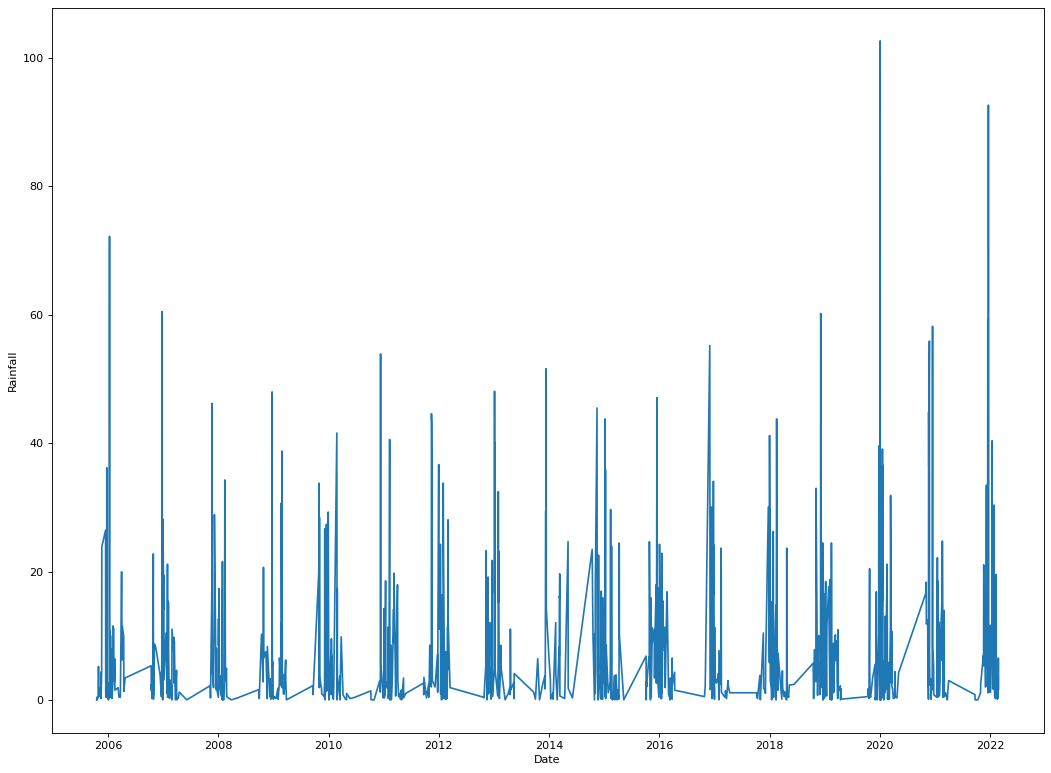

In [45]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)
sns.lineplot(data=data, x='Date', y='Rainfall')

By constructing the year_month column identifying the winter trend is easier

In [46]:
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
data['year_month'] = data['Year'].astype(str) + '_' + data['Month'].astype(str)

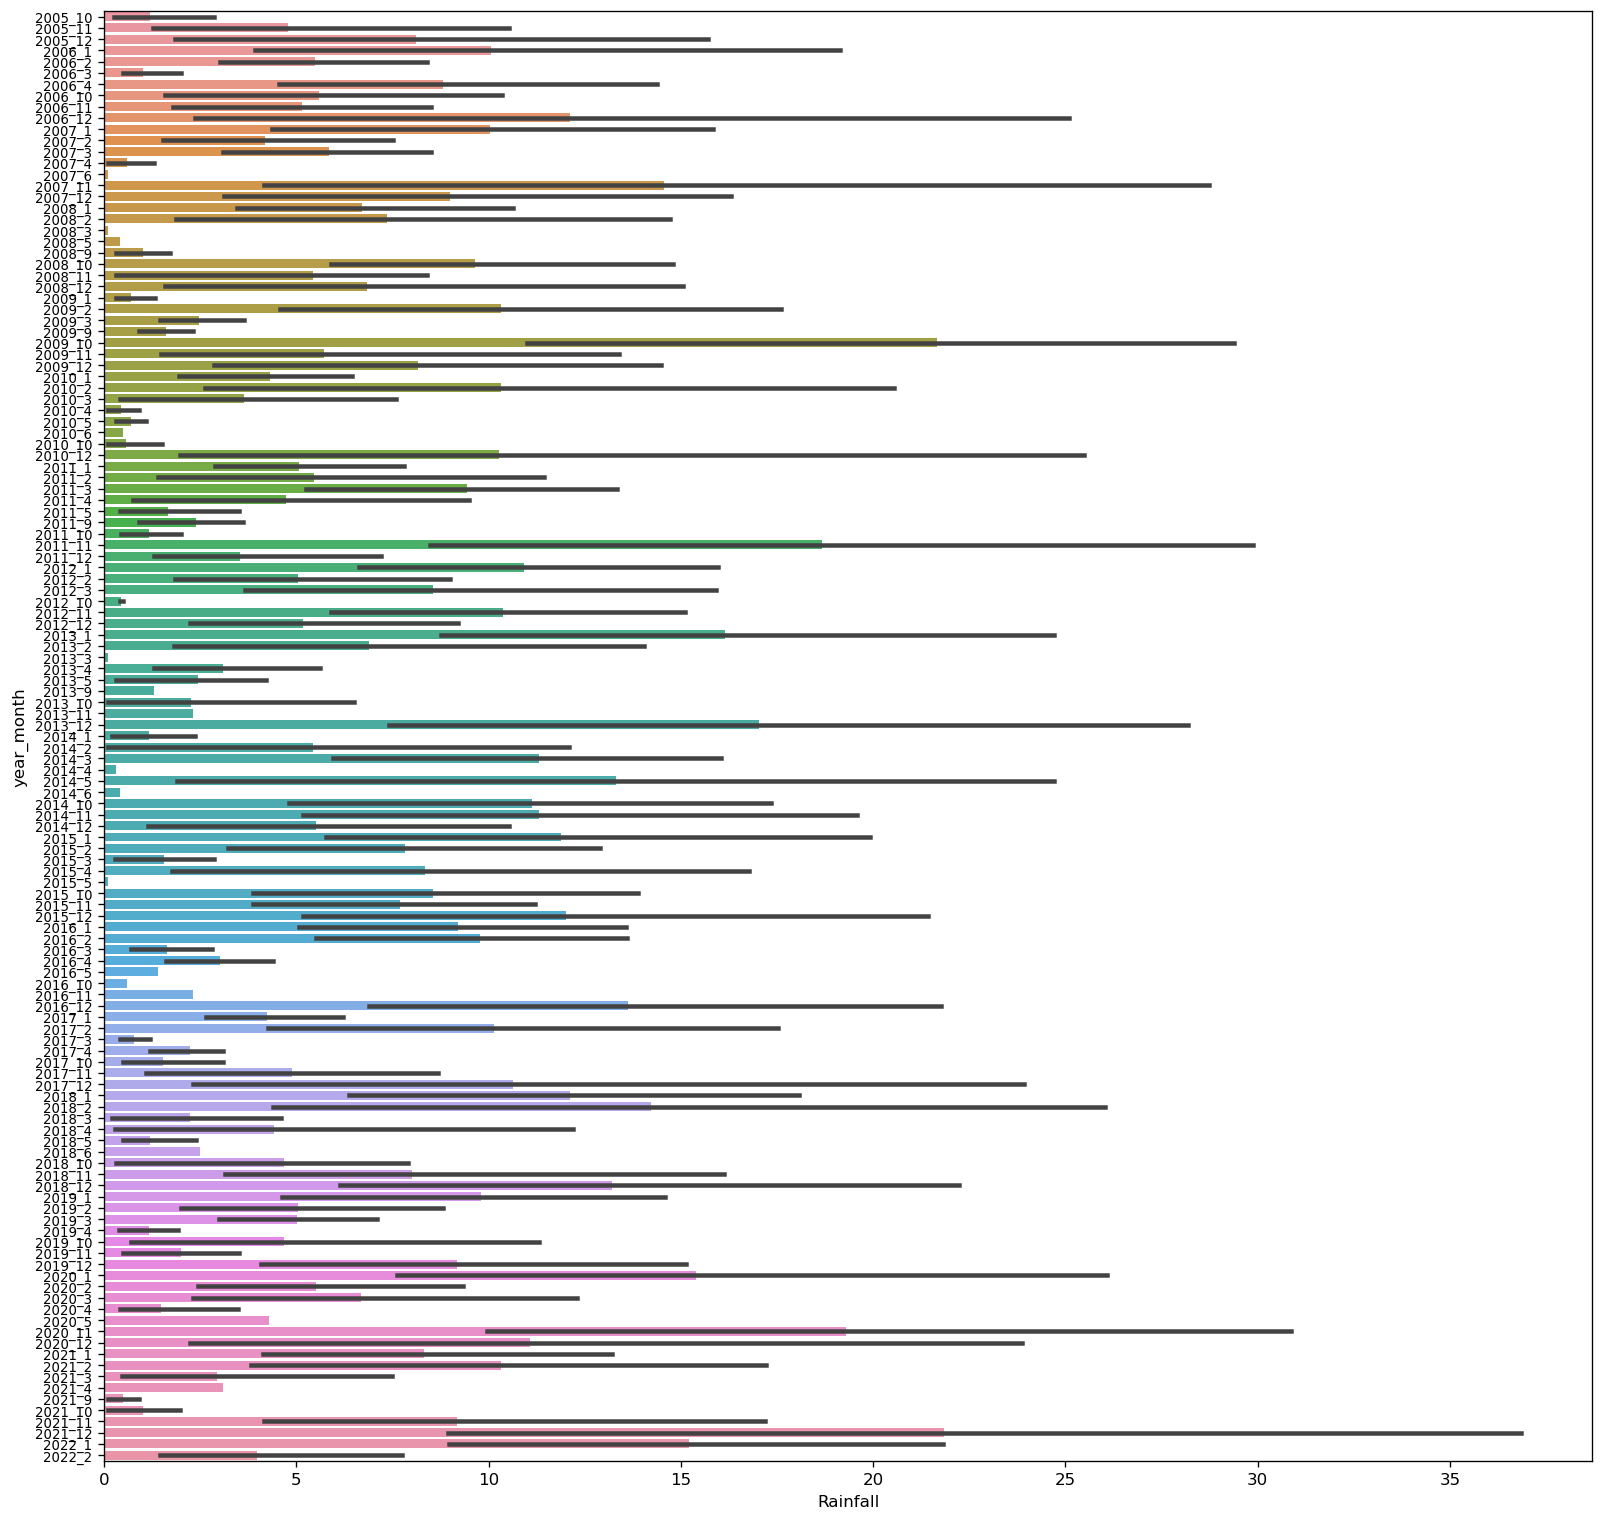

In [47]:
figure(figsize=(16, 16), dpi=120)
sns.barplot(data=data, y='year_month', x='Rainfall', orient = 'h')
plt.yticks(fontsize=8)
plt.show()

The best way to discover the seasonal trend is achived by defining seasons

In [48]:
season_dict = {'1': 'Winter',
               '2': 'Winter',
               '3': 'Spring', 
               '4': 'Spring',
               '5': 'Spring',
               '6': 'Summer',
               '7': 'Summer',
               '8': 'Summer',
               '9': 'Fall',
               '10': 'Fall',
               '11': 'Fall',
               '12': 'Winter'}
data['Season'] = data['Month'].apply(lambda x: season_dict[str(x)])

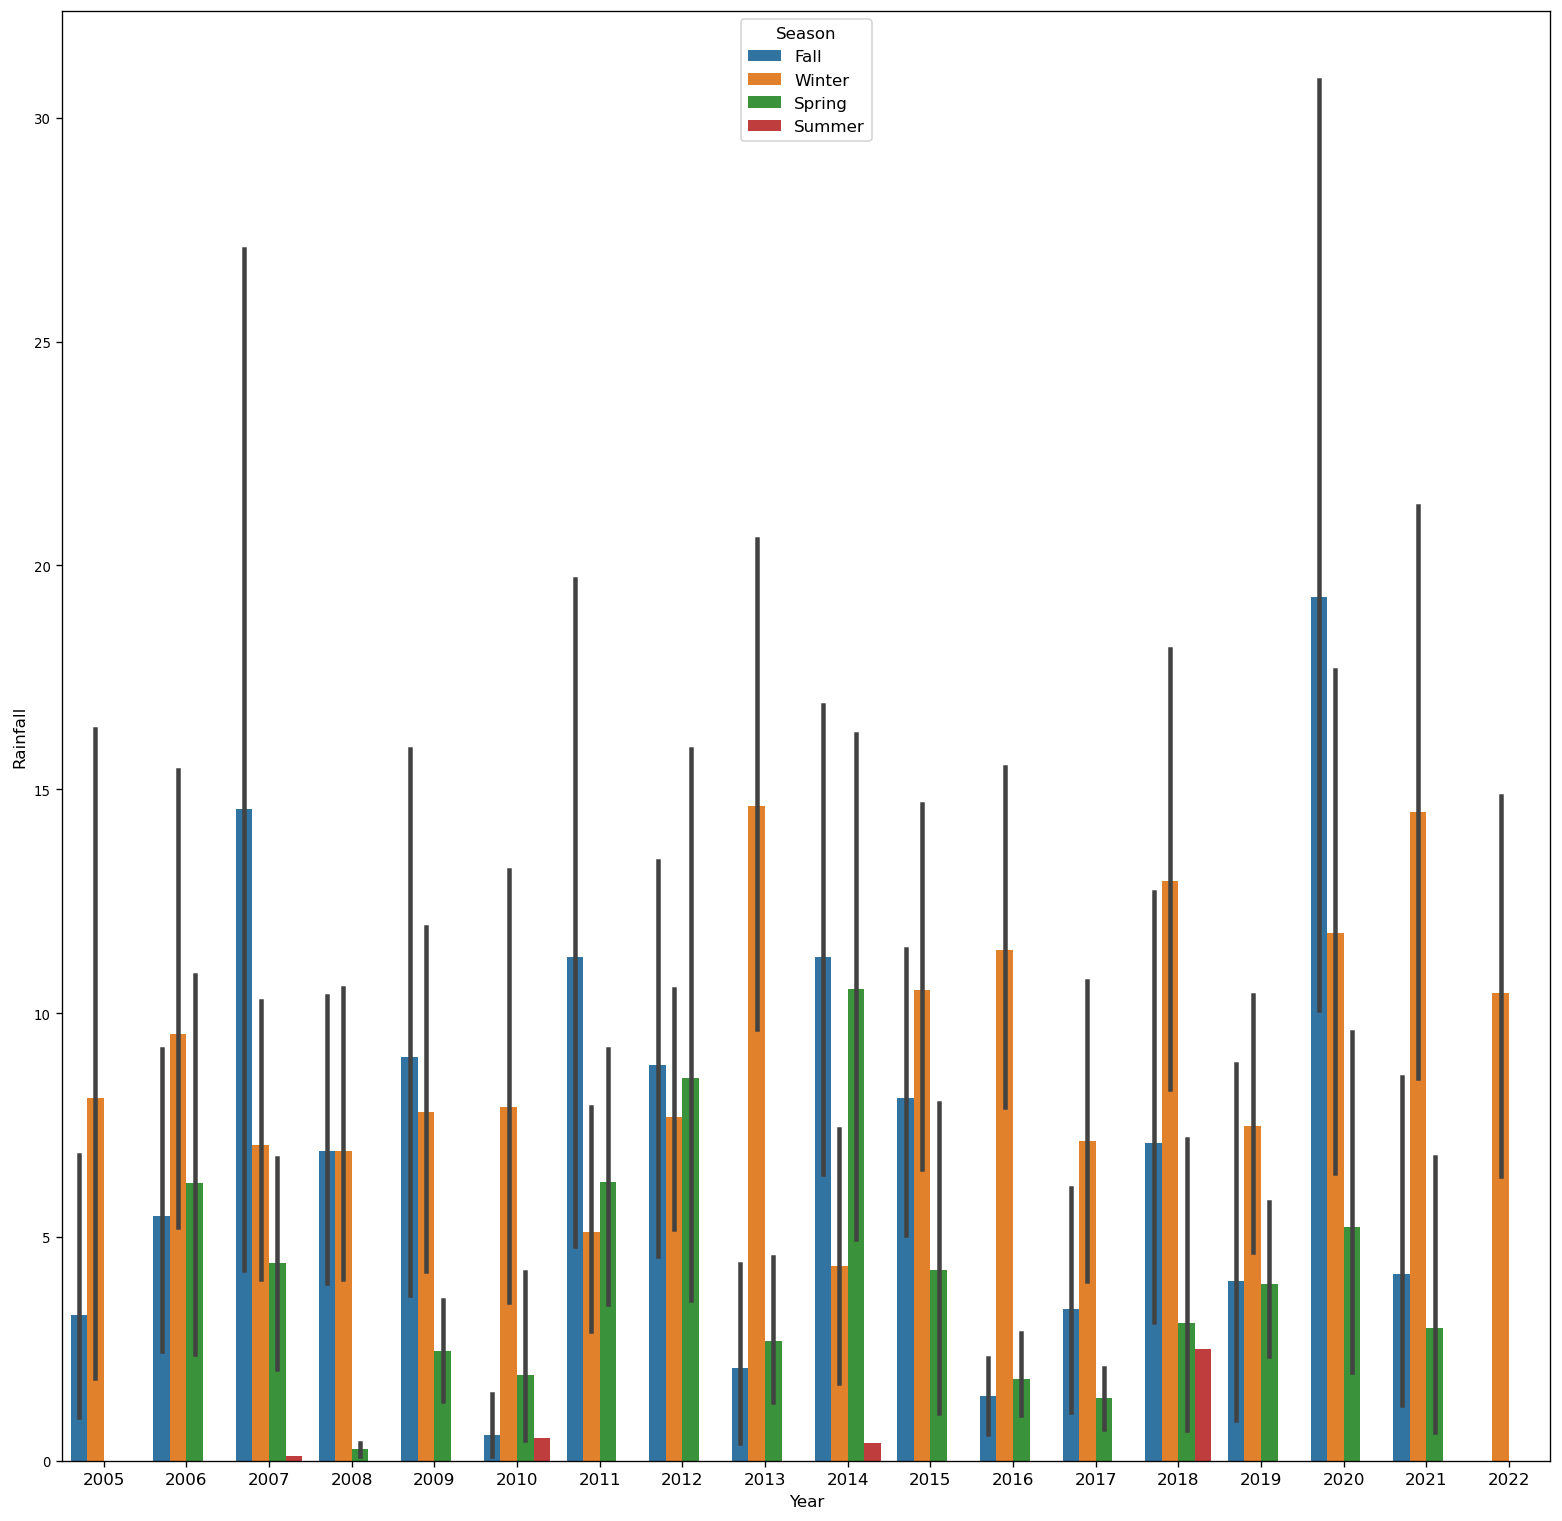

In [49]:
figure(figsize=(16, 16), dpi=120)
sns.barplot(data=data, x='Year', y='Rainfall', hue='Season')
plt.yticks(fontsize=8)
plt.show()

In [50]:
import statsmodels.api as sm

In [51]:
def find_least_squares(data, features):
    figure(figsize=(16, 16), dpi=120)

    df_hat = data.copy()
    y = df_hat['Rainfall']
    X = df_hat[features]
    print(X)
    X = sm.add_constant(X)
    ret = sm.OLS(y, X).fit()
    df_hat['y_hat'] = (X.values @ ret.params)
    sns.scatterplot(data=df_hat,x=df_hat.index, y='y_hat')
    sns.scatterplot(data=df_hat,x=df_hat.index, y='Rainfall')
    plt.title(f'response values y & y-hat scatterplot \n features: {features}')
    plt.xlabel('index')
    plt.ylabel('Rainfall')
    plt.legend(['y_hat', 'Rainfall'])
    plt.show()
    return df_hat, ret , y 

In [52]:
data['t'] = data['DayOfYear'].apply(lambda x: int(x) if x != 366 else 1) # addressing leap years
data['cos'] = data['t'].apply(lambda x: np.cos(2*np.pi*(x/365)))
data['sin'] = data['t'].apply(lambda x: np.sin(2*np.pi*(x/365)))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[911 rows x 0 columns]


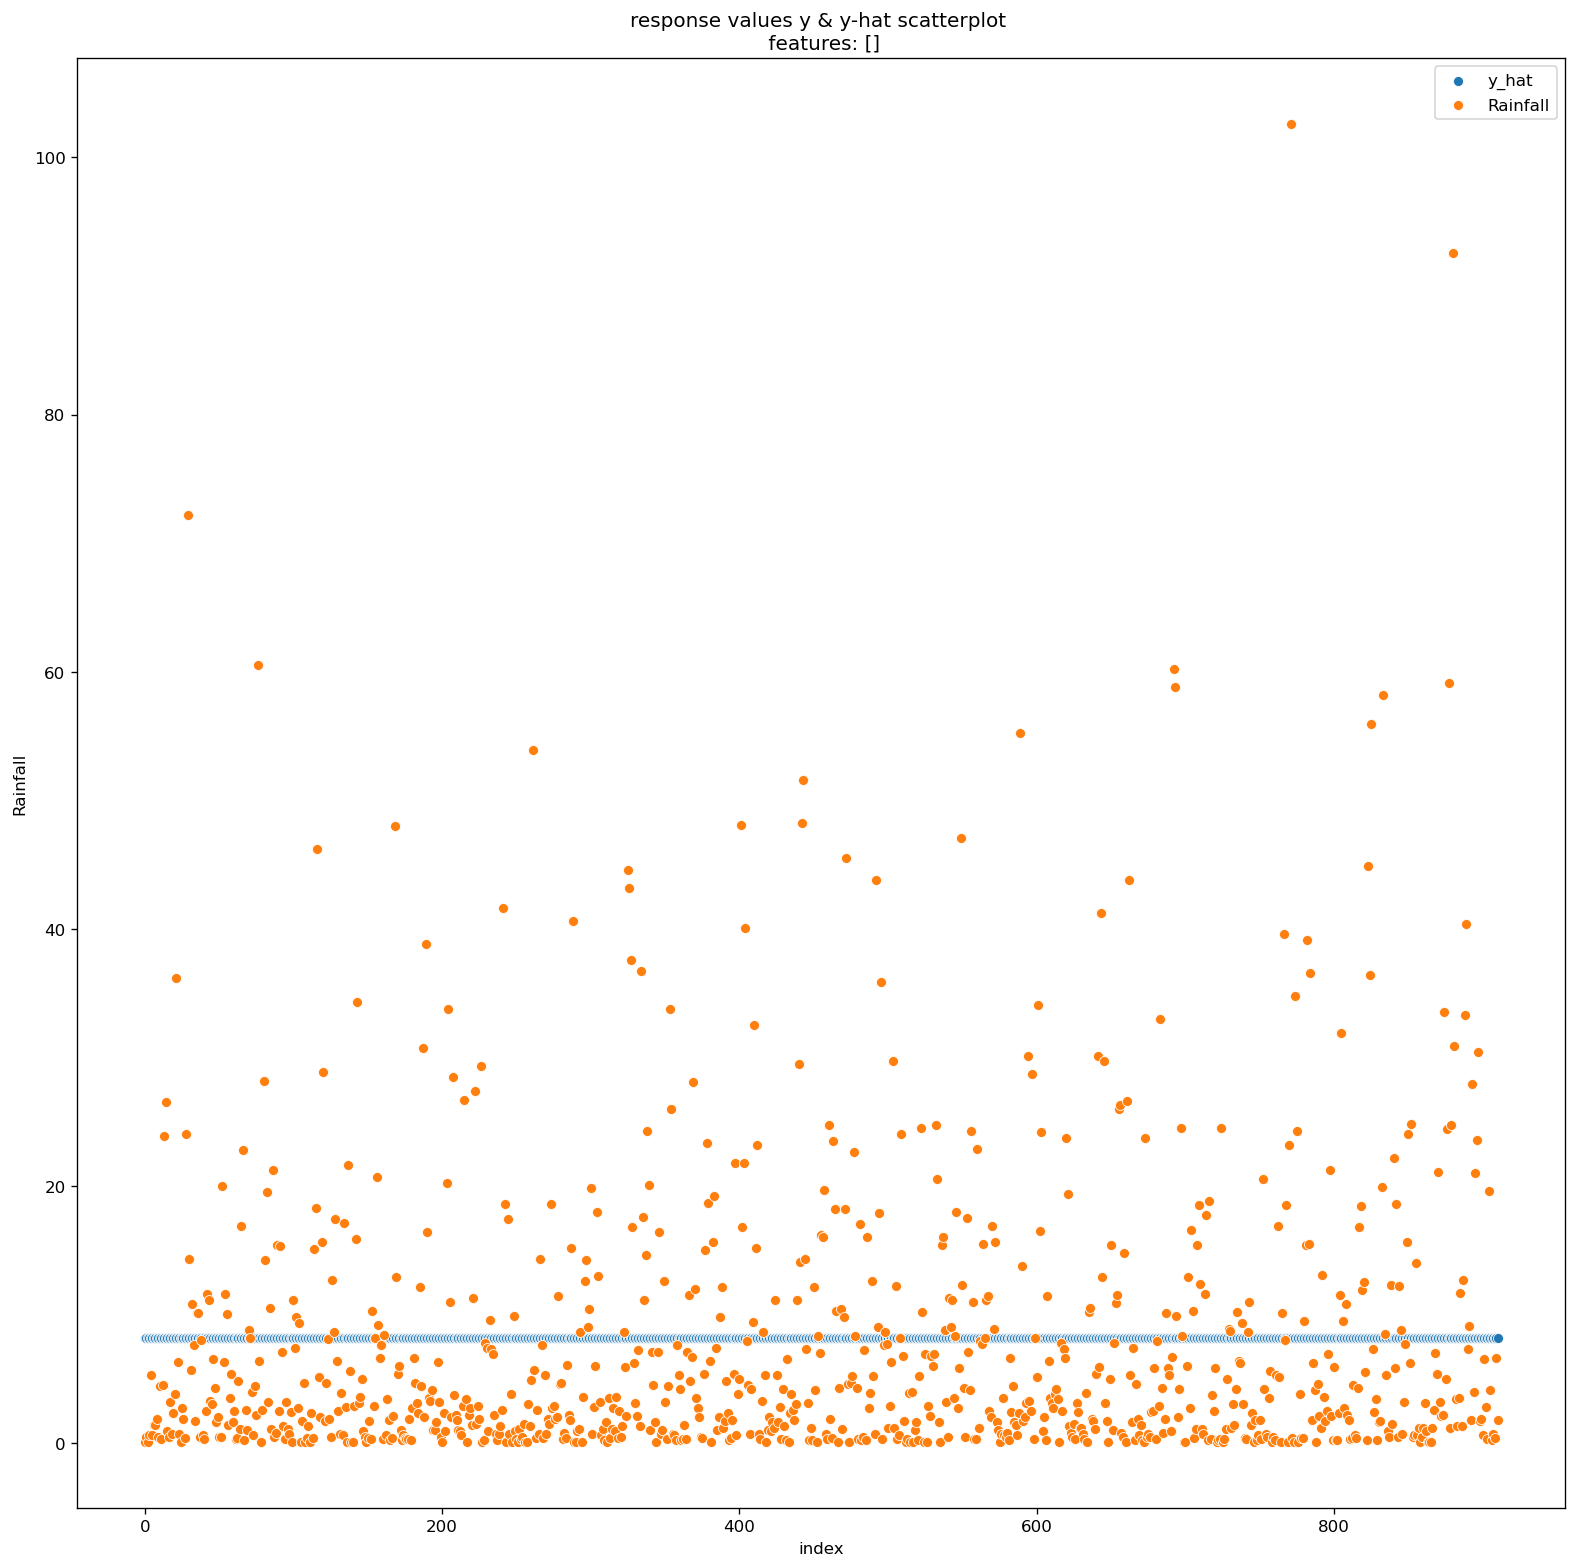

In [53]:
df_hat_basic, ret_basic , y  = find_least_squares(data, [])

          cos       sin
0    0.292600 -0.956235
1    0.309017 -0.951057
2    0.325342 -0.945596
3    0.467359 -0.884068
4    0.482508 -0.875892
..        ...       ...
906  0.664855  0.746972
907  0.651899  0.758306
908  0.584298  0.811539
909  0.570242  0.821477
910  0.556017  0.831171

[911 rows x 2 columns]


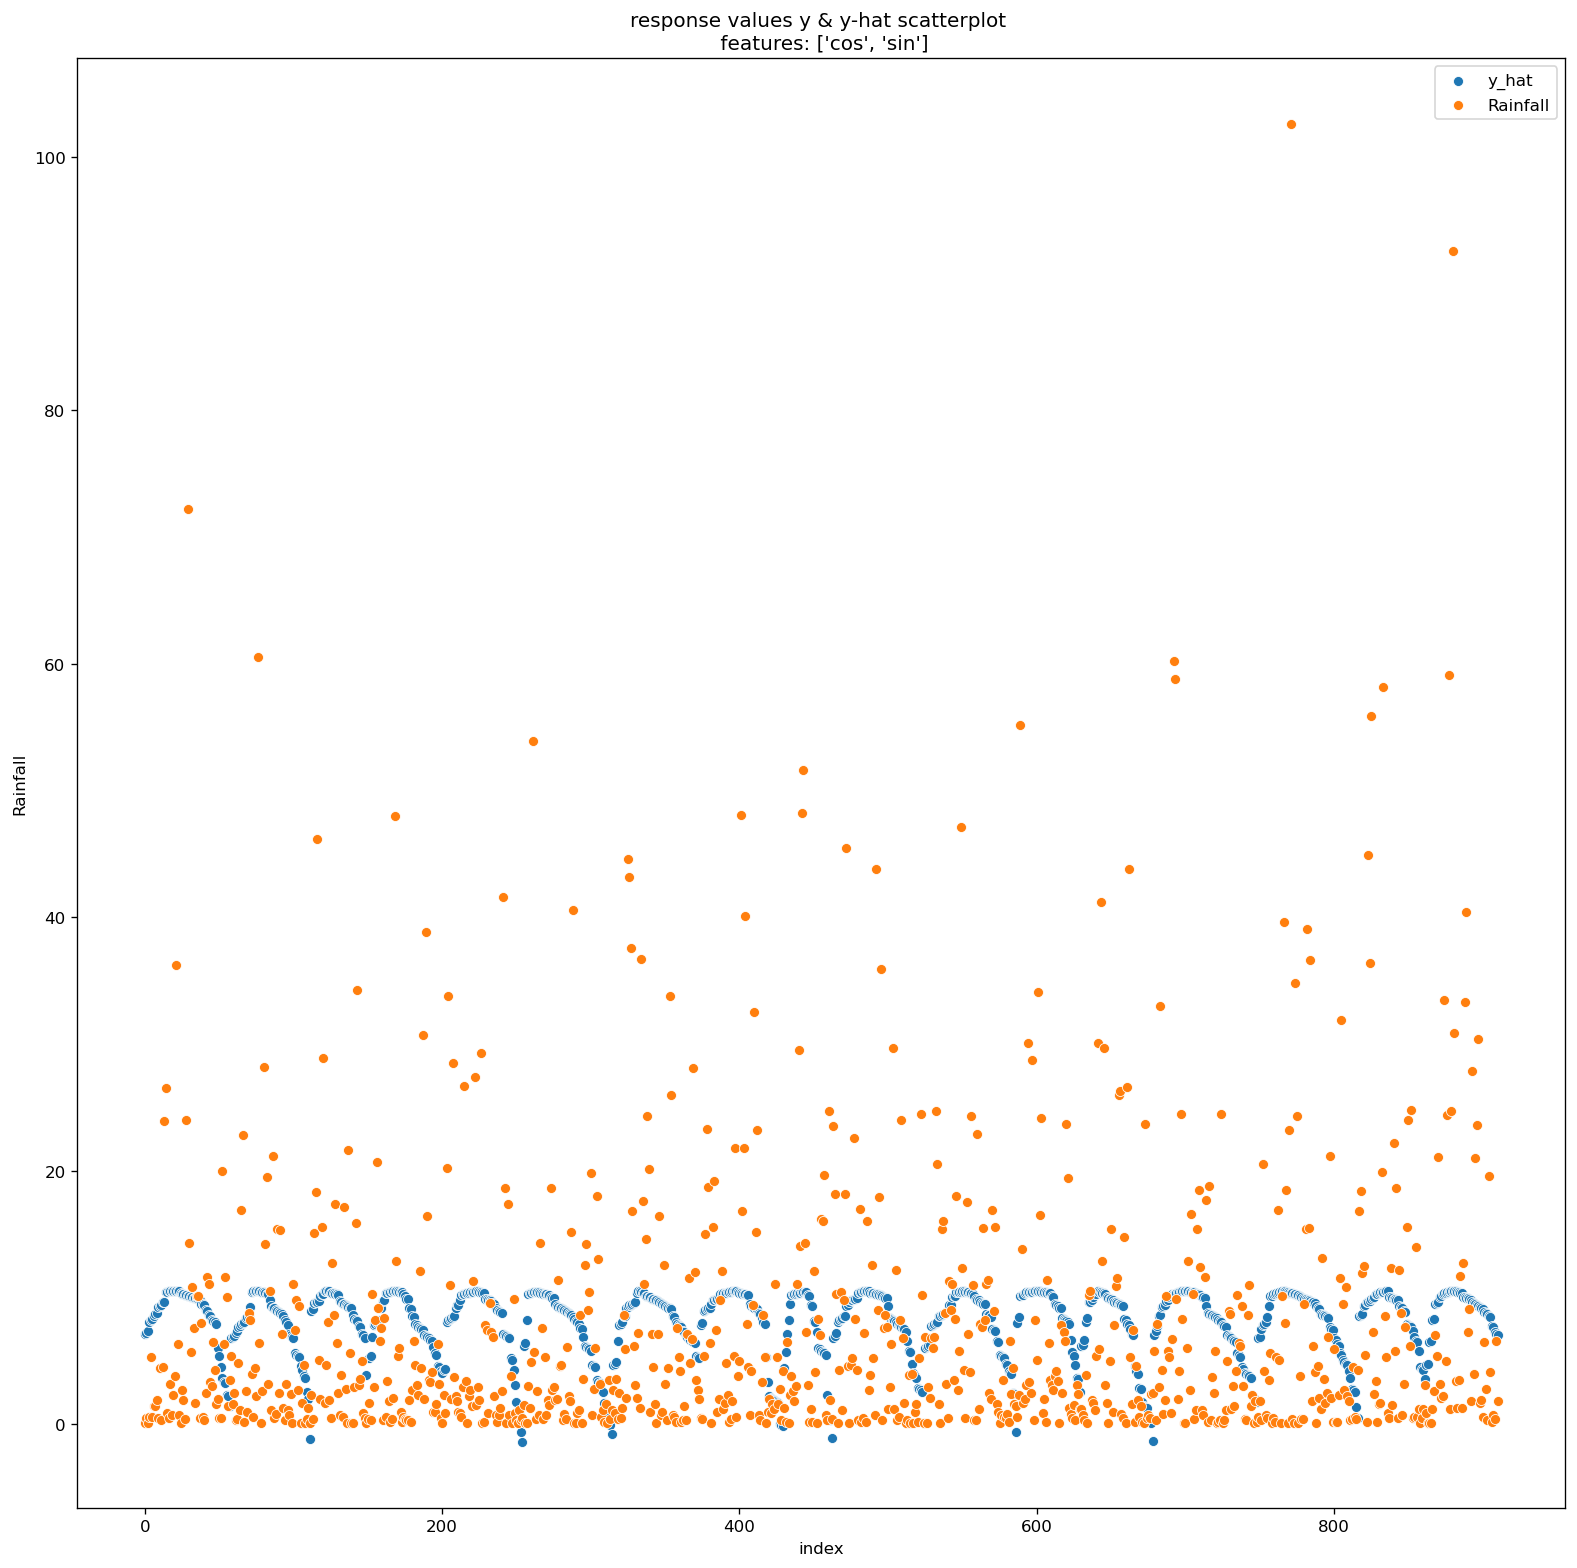

In [54]:
df_hat_period, ret_period , y = find_least_squares(data, ['cos','sin'])

In [55]:
def eval_t_p_stats(results):
    tt = results.t_test(np.eye(len(results.params)))        
    ret_df = tt.summary_frame()
    ret_df.index = results.pvalues.index
    ret_df['pvalues']= results.pvalues
    return ret_df

In [56]:
def get_R2(df_hat, y):
    y_hat = df_hat['y_hat'].values
    y_mean = y.mean()
    ss_tot = np.sum((y - y_mean)**2)
    ss_fit = np.sum((y_hat - y_mean)**2)
    ss_res = np.sum((y - y_hat)**2)
    r2 = 1 - ss_res / ss_tot
    y_mean, ss_tot, ss_fit, ss_res, r2

    # from sklearn.metrics import r2_score
    # r2_score(y, y_hat)
#     print(f"The R2 value is {r2}")
    return r2

In [57]:
print(f"R2 of basic model is {get_R2(df_hat_basic,y)}, R2 of periodic model is {get_R2(df_hat_period,y)}")

R2 of basic model is 0.0, R2 of periodic model is 0.04953172358840496


In [58]:
eval_t_p_stats(ret_basic)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalues
const,8.142261,0.388007,20.984819,4.715602e-80,7.380768,8.903754,4.715602e-80


In [59]:
eval_t_p_stats(ret_period)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalues
const,4.550862,0.756580,6.015043,2.604729e-09,3.066013,6.035711,2.604729e-09
cos,5.872224,0.971927,6.041835,2.221031e-09,3.964739,7.779710,2.221031e-09
sin,-0.913058,0.621578,-1.468935,1.421969e-01,-2.132954,0.306839,1.421969e-01


Seems like we can reject beta0 for the periodic model, but unsure

2) We would like to test whether future data follows a similar distribution to past data. Consider two datasets modeled by
$$
\begin{equation}
y = Z \beta + \epsilon,\qquad y_{new} = Z_{new} \beta + \epsilon_{new}
\label{eq:model} \tag{2}
\end{equation}
$$
where $Z \in \reals^{m\times p}$ and $Z_{new} \in \reals^{n\times p}$ are the given design matrices which both assume to have rank $p$. We also assume that $\epsilon$ and $\epsilon_{new}$ are independent. We will think of $(Z, y)$ as the initial data pair and $(Z_{new},y_{new})$ as the new data.

Let $\hat{\beta} = (Z \top Z)^{-1}Z^\top y$ be the usual least-squares (LS) estimate on the initial data. Define the predicted values as
 $$
 \hat{y}_{new} := Z_{new} \hat{\beta}
 $$
 (note that $\hat{y}_{new}$ is not the LS estiamte of $y_{new}$ from $Z_{new}$)
 
 - Show that $\mathrm{Cov}(y-\hat{y},y_{new} - \hat{y}_{new})=0$
 
 - Assume $\epsilon_{new} \sim \Ncal(0,\sigma^2 I_n)$. Find a (symmetric, positive definite) matrix $M \in \reals^{n \times n}$ so that
 $$
 M(y_{new} - \hat{y}_{new}) \sim \Ncal(0, \sigma^2 I_n).
 $$
 
- Give the distribution of the ratio
$$
\begin{equation}
A:= \frac{\frac{1}{n}\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2}{\frac{1}{m-d} \left\| Y  - \hat{Y} \right\|^2 }
\label{eq:A} \tag{3}
\end{equation}
$$
under the null hypothesis:
$$
H_0\,:\,\begin{cases} Y = Z \beta + \epsilon,\qquad Y_{new} = Z_{new} \beta + \epsilon_{new} \\
\epsilon \sim \Ncal(0, \sigma^2 I_m),\qquad \epsilon_{new} \sim \Ncal(0, \sigma^2 I_n) \\
\text{$\epsilon$ and $\epsilon_{new}$ are independent}
\end{cases}
$$

We now consider implementing a series of hypothesis tests about whether daily rainfall is remaining consistent over the years or whether it is changing in some meaningful way. 

- For each of the years 2010, 2011,...,2021, repeat the following. Define a data matrix $Z$ using the features in $\eqref{eq:model}$ consisting of all dates prior to that year (so that for 2010, $Z$ will be
a data matrix for the years 2005–2009, for 2011, $Z$ will be the data for years 2005-2011, and
so on). Define the responses $y$ to consist of rainfall for the given years. Define the new data matrix $Z_{new} \in \reals^{n \times p}$ to consist of the $n$ days of measurements in the given year ($n\leq 366$) and the responses $y_{new}$ to be the rainfall in those days. For this data, compute the statistic $A$ in $\eqref{eq:A}$ and its p-value, that is, conditional on
$A = a$, report
$$
p := \Pr[A \geq a] \quad \text{under $H_0$}
$$
Plot the P-values for each of the years and also print their values. Discuss briefly. 
- Suppose that you obtained a very small p-value of some year, say $p \approx 10^{-5}$. Does rejecting the null hypothesis necessarily mean that the distribution of rainfall is changing over time? explain in 2-3 sentences. 

3) Consider the total amount of rainfall within each month. Suppose that we assume that there is no change in the distribution over time across years, but we suspect that December is usuallly rainier than February. Design a test procedure that checks whether this is true. Use two apporaches:
 - Two-sample t-test 
 - Paired t-test 
 - Which approach seems more approproate here? 